In [2]:
import pandas as pd
import glob
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
curated_path = "../data/curated/property_all_with_SA2_classified/*.csv"
file_lst2 = []
for fname in glob.glob(curated_path):
    file_lst2.append(fname)
file_lst2
# combine all files in the list
df = pd.concat([pd.read_csv(f) for f in file_lst2 ])

In [4]:
df

,Unnamed: 0,address,latitude,longitude,nbed,nbath,ncar,price,historical_dates,postcode,year,month,suburb,weekly_rent,SA2_CODE,residence_type
0,126868,"7 SCOTT STREET, CHILTERN",-36.153794,146.592627,2.0,1.0,4,$200_per_week,August 2016,3683,2016,8,CHILTERN,200,204031070,House
1,126871,"13 BURKE STREET, CHILTERN",-36.152878,146.607758,2.0,1.0,1,$250_Weekly,July 2016,3683,2016,7,CHILTERN,250,204031070,House
2,126882,"30 O'SHEAS ROAD, CHRISTMAS HILLS",-37.643953,145.309304,4.0,2.0,1,$600_per_week,November 2016,3775,2016,11,HILLS,600,209031212,House
3,126883,"30 O'SHEAS ROAD, CHRISTMAS HILLS",-37.643953,145.309304,4.0,2.0,1,$600_per_week,December 2016,3775,2016,12,HILLS,600,209031212,House
4,126885,"90 WESTERING ROAD, CHRISTMAS HILLS",-37.677565,145.269523,3.0,1.0,0,$550_per_week,August 2016,3775,2016,8,HILLS,550,209031212,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19599,19598,"12 ST JAMES DRIVE, YINNAR",-38.326434,146.327532,3.0,1.0,2,$290,August 2018,3869,2018,8,YINNAR,290,205041094,House
19600,19600,"2 FIRMIN STREET, YINNAR",-38.319024,146.329616,2.0,1.0,1,$180_pw,April 2018,3869,2018,4,YINNAR,180,205041094,House
19601,19601,"9 WICKS STREET, YINNAR",-38.323214,146.328042,3.0,1.0,1,$250_pw,March 2018,3869,2018,3,YINNAR,250,205041094,House
19602,19602,"1/16 HOPKINS COURT, YINNAR",-38.325393,146.321809,2.0,1.0,1,$200_pw,February 2018,3869,2018,2,YINNAR,200,205041094,House


In [5]:

type_df = df[['residence_type', 'year','weekly_rent','postcode']]\
        .groupby(['residence_type'],as_index = False) \
        .agg(
            {\
                'weekly_rent': 'mean', # count number of instances from sample
                'postcode': 'count'
            }
        ) \
        .rename({'postcode': 'num','weekly_rent': 'averaged_wk_rent' }, axis=1)

type_df

,residence_type,averaged_wk_rent,num
0,Apartment,395.104679,52016
1,House,465.697182,179481


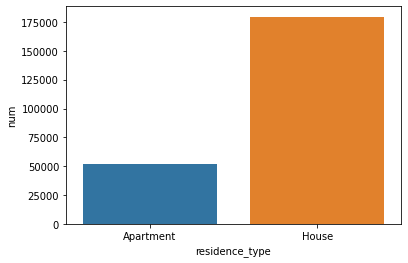

In [6]:
#plt.figure(figsize=(15,15))
ax = sns.barplot(
    data=type_df, y="num", x="residence_type",
)

In [7]:

sa2_df = df[['residence_type', 'year','weekly_rent','postcode','SA2_CODE']]\
        .groupby(['SA2_CODE' ,'residence_type'],as_index = False) \
        .agg(
            {\
                'weekly_rent': 'mean', # count number of instances from sample
                'postcode': 'count'
            }
        ) \
        .rename({'postcode': 'num','weekly_rent': 'averaged_wk_rent' }, axis=1)

sa2_df

,SA2_CODE,residence_type,averaged_wk_rent,num
0,201011001,Apartment,217.115385,26
1,201011001,House,396.148117,1195
2,201011002,Apartment,257.823529,85
3,201011002,House,358.575368,1088
4,201011005,Apartment,254.242424,33
...,...,...,...,...
972,217041478,House,500.601329,301
973,217041479,Apartment,247.244898,49
974,217041479,House,386.385519,511
975,217041480,Apartment,297.977273,44


In [8]:
sa2_df_a = sa2_df[sa2_df.residence_type == 'Apartment']
sa2_df_h = sa2_df[sa2_df.residence_type == 'House']

In [9]:
sa2_df_a = sa2_df_a.sort_values(by=['num'],ascending=False)
top_50_a = sa2_df_a.head(50)

In [10]:
sa2_df_h = sa2_df_h.sort_values(by=['num'],ascending=False)
top_50_h= sa2_df_h.head(50)

In [12]:
vic_sa2 = pd.read_csv('../data/curated/sa2_vic.csv')

In [13]:
vic_sa2

,Unnamed: 0,SA2_NAME21,SA2_CODE21
0,644,Alfredton,201011001
1,645,Ballarat,201011002
2,646,Buninyong,201011005
3,647,Delacombe,201011006
4,648,Smythes Creek,201011007
...,...,...,...
519,1163,Moyne - West,217041478
520,1164,Warrnambool - North,217041479
521,1165,Warrnambool - South,217041480
522,1166,Migratory - Offshore - Shipping (Vic.),297979799


In [14]:
top_df_a = top_50_a.merge(vic_sa2, how='left', left_on='SA2_CODE',right_on = 'SA2_CODE21')

In [15]:
top_df_a = top_df_a[['SA2_NAME21','SA2_CODE21']]

In [16]:
top_df_h = top_50_h.merge(vic_sa2, how='left', left_on='SA2_CODE',right_on = 'SA2_CODE21')

In [17]:
top_df_h = top_df_h[['SA2_NAME21','SA2_CODE21']]

In [18]:
html = top_df_a.to_html()
import os
# write html to file
path = '../web/templates/html/'
if not os.path.exists(path):
    os.makedirs(path)
text_file = open("../web/templates/html/top_df_a.html", "w")
text_file.write(html)
text_file.close()

In [19]:
html = top_df_h.to_html()
import os
# write html to file
path = '../web/templates/html/'
if not os.path.exists(path):
    os.makedirs(path)
text_file = open("../web/templates/html/top_df_h.html", "w")
text_file.write(html)
text_file.close()

In [20]:
top100 = pd.concat([top_df_a, top_df_h])

In [21]:
top100

,SA2_NAME21,SA2_CODE21
0,Prahran - Windsor,206061136
1,Elwood,206051129
2,North Melbourne,206041506
3,St Kilda - Central,206051513
4,St Kilda - West,206051514
...,...,...
45,Braybrook,213031347
46,Chelsea - Bonbeach,208031186
47,Bentleigh - McKinnon,208021174
48,Shepparton - North,216031416
